# Maze

In [1]:
import numpy as np
rg = np.random.default_rng(1)

import matplotlib.pyplot as plt
%matplotlib inline
import random

[(4, 4), (5, 3)]


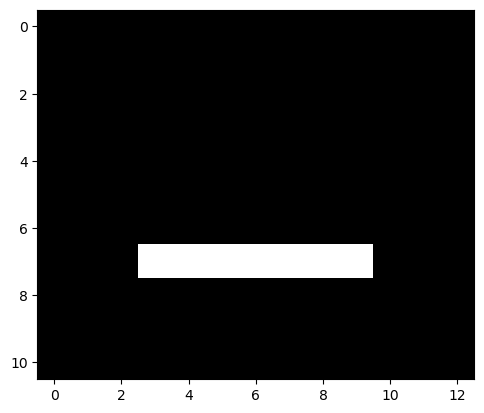

In [2]:
def maze_to_pixel(x, y):
    """Converts a maze coordinate to an image pixel location."""
    return (y * 2 + 1, x * 2 + 1)


class Maze():
    
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.pixels = np.zeros(maze_to_pixel(width, height))
    
    def clear(self, x, y):
        """Clears the cell at the given x, y position."""
        self.pixels[maze_to_pixel(x, y)] = 1
        
    def carve(self, start, end):
        """Carves a path from the given start cell to the end cell."""
        sx, sy = maze_to_pixel(*start)
        ex, ey = maze_to_pixel(*end)
        
        if sx > ex:
            sx, ex = ex, sx
            
        if sy > ey:
            sy, ey = ey, sy
        
        for x in range(sx, ex + 1):
            for y in range(sy, ey + 1):
                self.pixels[(x, y)] = 1
    
    def calc_neighbors(self, x, y):
        """Returns all valid neighbors of (x, y)"""
        possible_neighbors = [(x - 1, y), (x + 1, y), (x, y + 1), (x, y - 1)]
        return [(x, y) for x, y in possible_neighbors if x >= 0 and y >= 0 and x < self.width and y < self.height]
    
    def _ipython_display_(self):
        plt.imshow(self.pixels, cmap = 'gray')

maze = Maze(6, 5)
print(maze.calc_neighbors(5, 4))
#for y in range (maze.height):
#    for x in range (maze.width):
#        maze.clear(x, y)
        
maze.carve((4, 3), (1, 3))
maze

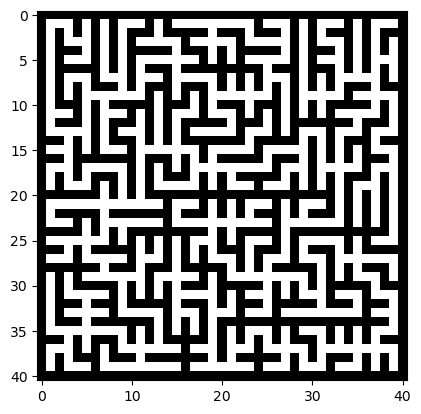

In [17]:
def aldous_broder(maze):
    start = (0, 0)
    visited = {start}
    current = start
    while len(visited) < maze.width * maze.height:
        neighbors = maze.calc_neighbors(*current)
        chosen_neighbor = random.choice(neighbors)
        if chosen_neighbor not in visited:
            maze.carve(current, chosen_neighbor)
            visited.add(chosen_neighbor)
        current = chosen_neighbor

maze = Maze(20, 20)
aldous_broder(maze)
maze